In [1]:
%pip install tensorflow
%pip install matplotlib
%pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from scipy.spatial import distance

Tensorflow version: 2.13.1 



Tensorflow version: 2.13.1 

Digit: 9
Index: 39293


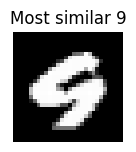

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


In [1]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_normalized = x_train/255
x_test_normalized = x_test/255

x_train_best = []  # Array für die ähnlichsten Bilder
y_train_best = []  # Array für die zugehörigen Labels
similar_indices = []  # Array für die Indizes der ähnlichsten Bilder

# Berechnung der ähnlichsten Ziffern für jede Klasse von 0 bis 9
for digit in range(10):
    
    print('Digit:', digit)
    # Filtern der Ziffern nach ihrer Klasse
    class_images = x_train[y_train == digit]

    # Berechnung der durchschnittlichen Cosinus-Ähnlichkeit für jede Ziffer zu anderen Ziffern derselben Klasse
    similarities = []
    for i, image in enumerate(class_images):
        avg_similarity = 0
        for other_image in class_images:
            if not np.array_equal(image, other_image):
                # Umwandlung von 28x28 Bildern in Vektoren für Cosinus-Ähnlichkeit
                image_vector = image.flatten()
                other_image_vector = other_image.flatten()
                # Berechnung der Cosinus-Ähnlichkeit
                cosine_similarity = 1 - distance.cosine(image_vector, other_image_vector)
                avg_similarity += cosine_similarity
        avg_similarity /= len(class_images) - 1  # Durchschnittliche Ähnlichkeit zu allen anderen Ziffern der Klasse außer sich selbst
        similarities.append((i, avg_similarity))

    # Sortieren nach der durchschnittlichen Ähnlichkeit und Auswahl der ähnlichsten Ziffer
    similarities.sort(key=lambda x: x[1], reverse=True)
    most_similar_index = similarities[0][0]

    most_similar_index_train_images = np.where((y_train == digit))[0][most_similar_index]
    most_similar_digit = x_train[most_similar_index_train_images]

    print('Index:', most_similar_index_train_images)
        
    # Hinzufügen des ähnlichsten Bildes, seines Labels und seines Index im train_images Array in den Arrays
    x_train_best.append(most_similar_digit)
    y_train_best.append(digit)
    similar_indices.append(most_similar_index_train_images)

# Umwandeln der Listen in numpy arrays
x_train_best = np.array(x_train_best)
y_train_best = np.array(y_train_best)
similar_indices = np.array(similar_indices)

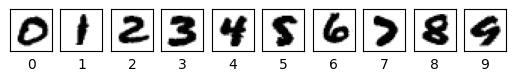

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_normalized = x_train/255
x_test_normalized = x_test/255
# RESHAPE
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

train_best_index = [47647, 17775, 42830, 13519, 1273, 26066, 21901, 10297, 46338, 39293]

x_train_b = []
y_train_b = []

for i in range(10):
                
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[train_best_index[i]], cmap=plt.cm.binary)
    plt.xlabel(y_train[train_best_index[i]])

    x_train_b.append(x_train[train_best_index[i]])
    y_train_b.append(y_train[train_best_index[i]])
    
# Umwandeln der Listen in numpy arrays
x_train_b = np.array(x_train_b)
y_train_b = np.array(y_train_b)

plt.show()
